# Método k-fold de Validación Cruzada

## Defino la función kFold

### Parámetros

**Datos:** Path al archivos train.csv.<br>
**cantFolds:** Es la cantidad de folds. Se ejecuta kNN por cada fold, así que no conviene poner más de 5 para que no demore tanto la ejecución.<br>
**k:** Parámetro k de kNN.<br>
**alfa:** Parámetro alfa de PCA. Si ponen alfa=0 se ejecuta kNN sin PCA.<br>
**semilla:** Es un parámetro opcional para que los resultados sean reproducibles, porque los datos de entrada se distribuyen en los folds de manera aleatoria.

Devuelve una lista con el accuracy de cada ejecución de kNN

In [2]:
import pandas as pd
import numpy as np
import metnum
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def kFold(datos, cantFolds, k, alfa, semilla=None):
    # Cargo los datos
    df_train = pd.read_csv(datos)
    
    # Desordeno los datos
    df_train = df_train.sample(frac=1, random_state=semilla)
    
    # Separo los datos en pixeles y etiquetas y los guardo en arrays de numpy
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    # Aplico PCA
    if (alfa > 0):
        pca = metnum.PCA(alfa)
        X = pca.transform(X)
    
    # Particiono el conjunto de datos en k folds del mismo tamaño
    folds = []
    limites = [0]
    
    for i in range(1,cantFolds+1):
        datosPorFold = len(df_train)//cantFolds
        limites.append(i*datosPorFold)
    
    for i in range(len(limites)-1):
        folds.append([X[limites[i]:limites[i+1]], y[limites[i]:limites[i+1]]])
        
    # Aplico kNN
    clf = metnum.KNNClassifier(k)
    acc = []
    
    for i in tqdm(range(cantFolds)):
        # Creo una lista para separar el índice del fold que voy a usar para validar
        indices = [[],i]
        for j in range(cantFolds):
            if (j != i):
                indices[0].append(j)

        X_val = folds[indices[1]][0]
        y_val = folds[indices[1]][1]

        # Uno todos los folds que voy a usar para entrenar en un único array de numpy
        X_train = folds[indices[0][0]][0]
        y_train = folds[indices[0][0]][1]
        indices[0].pop()

        for j in indices[0]:
            X_train = np.concatenate([X_train, folds[j][0]])
            y_train = np.concatenate([y_train, folds[j][1]])

        # Aplico kNN
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        acc.append(accuracy_score(y_val, y_pred))
    
    return acc

### Fijo los parámetros k de kNN, alfa de PCA y la cantidad de folds, y pruebo desordenar el dataset con varias semillas diferentes.

In [2]:
datos = "../data/train.csv"

In [3]:
semillas = [10,20,50,100,200,300,400,500,5000,6000,7000,8000]
resultados1 = []
alfa = 15
k = 10
cantFolds = 5

In [4]:
for s in tqdm(semillas):
    resultados1.append(kFold(datos,cantFolds,k,alfa,s))

100%|██████████| 12/12 [38:50<00:00, 194.24s/it]


In [5]:
resultados1

[[0.9488095238095238,
  0.9521428571428572,
  0.9544047619047619,
  0.9486904761904762,
  0.9453571428571429],
 [0.9517857142857142,
  0.9501190476190476,
  0.9479761904761905,
  0.9486904761904762,
  0.9513095238095238],
 [0.9536904761904762,
  0.949047619047619,
  0.9502380952380952,
  0.9473809523809524,
  0.949047619047619],
 [0.9514285714285714,
  0.9523809523809523,
  0.9523809523809523,
  0.950952380952381,
  0.9471428571428572],
 [0.9513095238095238,
  0.9508333333333333,
  0.9492857142857143,
  0.9492857142857143,
  0.9528571428571428],
 [0.9513095238095238,
  0.9494047619047619,
  0.9511904761904761,
  0.9520238095238095,
  0.9533333333333334],
 [0.9471428571428572,
  0.9502380952380952,
  0.9508333333333333,
  0.9513095238095238,
  0.9539285714285715],
 [0.9519047619047619,
  0.9471428571428572,
  0.9482142857142857,
  0.9503571428571429,
  0.9534523809523809],
 [0.9525,
  0.950595238095238,
  0.9529761904761904,
  0.9508333333333333,
  0.9472619047619047],
 [0.9501190476190

In [1]:
resultados1 = [[0.9488095238095238,
  0.9521428571428572,
  0.9544047619047619,
  0.9486904761904762,
  0.9453571428571429],
 [0.9517857142857142,
  0.9501190476190476,
  0.9479761904761905,
  0.9486904761904762,
  0.9513095238095238],
 [0.9536904761904762,
  0.949047619047619,
  0.9502380952380952,
  0.9473809523809524,
  0.949047619047619],
 [0.9514285714285714,
  0.9523809523809523,
  0.9523809523809523,
  0.950952380952381,
  0.9471428571428572],
 [0.9513095238095238,
  0.9508333333333333,
  0.9492857142857143,
  0.9492857142857143,
  0.9528571428571428],
 [0.9513095238095238,
  0.9494047619047619,
  0.9511904761904761,
  0.9520238095238095,
  0.9533333333333334],
 [0.9471428571428572,
  0.9502380952380952,
  0.9508333333333333,
  0.9513095238095238,
  0.9539285714285715],
 [0.9519047619047619,
  0.9471428571428572,
  0.9482142857142857,
  0.9503571428571429,
  0.9534523809523809],
 [0.9525,
  0.950595238095238,
  0.9529761904761904,
  0.9508333333333333,
  0.9472619047619047],
 [0.9501190476190476,
  0.9527380952380953,
  0.9514285714285714,
  0.9465476190476191,
  0.9489285714285715],
 [0.9444047619047619,
  0.9527380952380953,
  0.9520238095238095,
  0.9544047619047619,
  0.9463095238095238],
 [0.9528571428571428,
  0.9478571428571428,
  0.9489285714285715,
  0.9466666666666667,
  0.9525]]

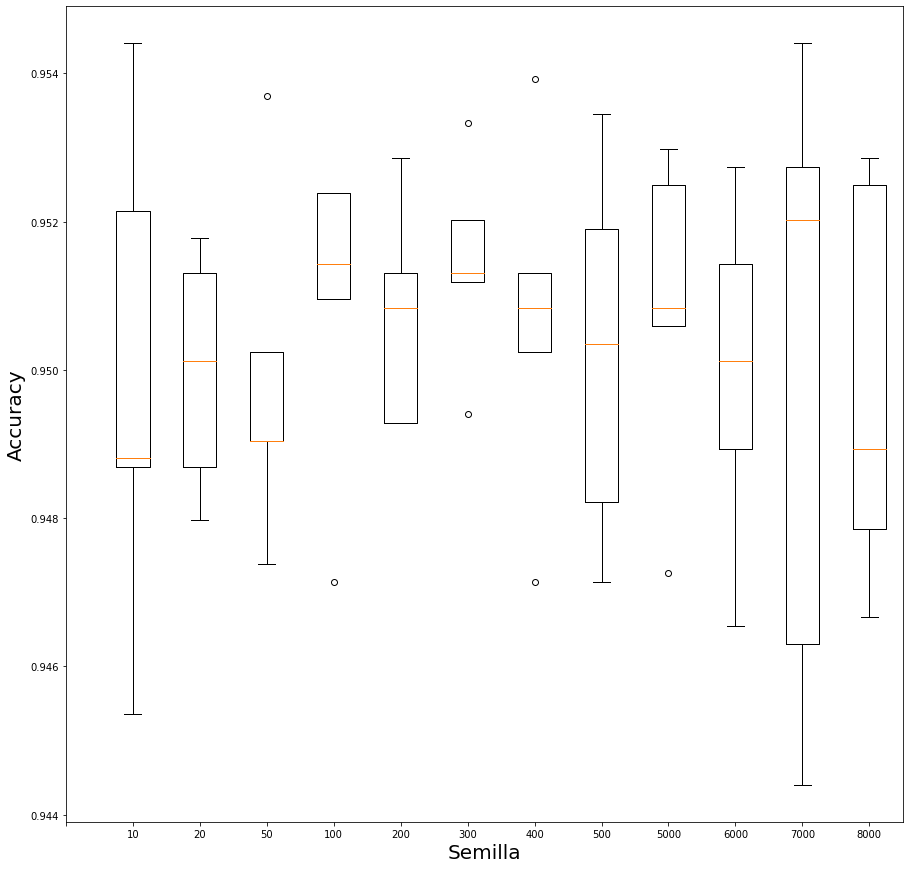

In [117]:
plt.boxplot(resultados1)
plt.rcParams["figure.figsize"] = [15,15]
plt.xlabel('Semilla', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(range(13), ["",10,20,50,100,200,300,400,500,5000,6000,7000,8000])
plt.savefig("kfold_resultados1.png", bbox_inches='tight')

### Ahora me fijo las diferencias entre los resultados promedio y los resultados de las iteraciones que dejan al último fold para validar

In [20]:
promedios1 = []

for r in resultados1:
    promedios1.append(np.mean(r))

diferencias1 = []

for r in resultados1:
    diferencias1.append(abs(np.mean(r) - r[4]))

In [21]:
promedios1

[0.9498809523809524,
 0.9499761904761905,
 0.9498809523809524,
 0.9508571428571428,
 0.9507142857142856,
 0.9514523809523808,
 0.9506904761904762,
 0.9502142857142857,
 0.9508333333333333,
 0.949952380952381,
 0.9499761904761904,
 0.9497619047619048]

In [22]:
diferencias1

[0.0045238095238094855,
 0.0013333333333332975,
 0.0008333333333333526,
 0.00371428571428567,
 0.002142857142857224,
 0.0018809523809525386,
 0.003238095238095262,
 0.003238095238095262,
 0.0035714285714285587,
 0.001023809523809538,
 0.003666666666666596,
 0.002738095238095206]

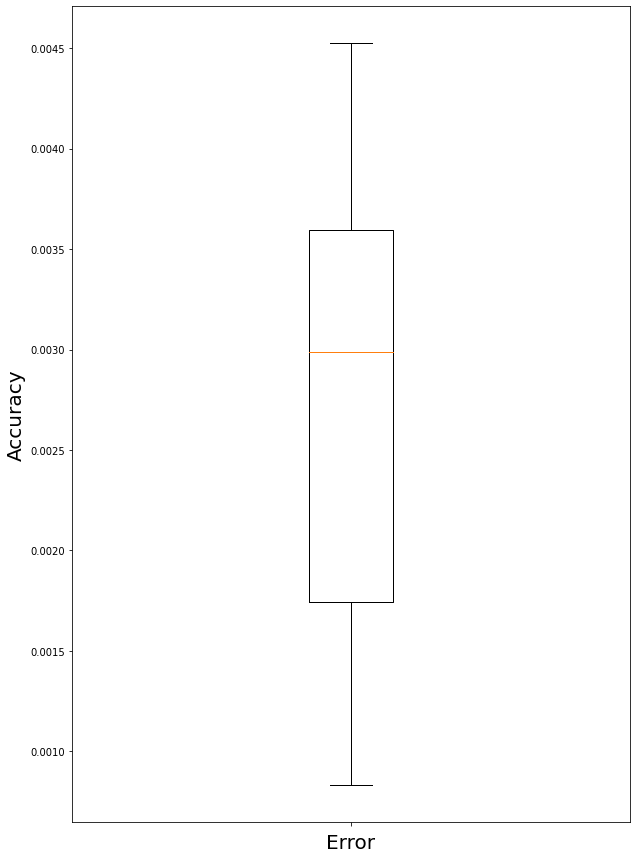

In [123]:
plt.boxplot(diferencias1)
plt.rcParams["figure.figsize"] = [10,15]
plt.xlabel('Error', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks([1],[""])
plt.savefig("kfold_diferencias1.png", bbox_inches='tight')

### Fijo una semilla y pruebo variando la cantidad de folds

In [6]:
s = 100
cantFolds = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
resultados2 = []

for cf in cantFolds:
    resultados2.append(kFold(datos,cf,k,alfa,s))

100%|██████████| 15/15 [03:15<00:00, 13.02s/it]


In [7]:
resultados2

[[0.9473809523809524, 0.946952380952381],
 [0.9442857142857143, 0.9452142857142857, 0.9439285714285715],
 [0.9497142857142857, 0.9496190476190476, 0.9482857142857143, 0.946],
 [0.9514285714285714,
  0.9523809523809523,
  0.9523809523809523,
  0.950952380952381,
  0.9471428571428572],
 [0.9525714285714286,
  0.9508571428571428,
  0.9504285714285714,
  0.9514285714285714,
  0.9527142857142857,
  0.9478571428571428],
 [0.9516666666666667,
  0.9525,
  0.9523333333333334,
  0.9521666666666667,
  0.953,
  0.951,
  0.9486666666666667],
 [0.952,
  0.9527619047619048,
  0.9544761904761905,
  0.9542857142857143,
  0.952952380952381,
  0.9527619047619048,
  0.9514285714285714,
  0.9499047619047619],
 [0.9541363051864552,
  0.953493356193742,
  0.9549935705100728,
  0.9554222031718816,
  0.9502786112301758,
  0.9564937848264038,
  0.9502786112301758,
  0.9513501928846978,
  0.9504929275610802],
 [0.9538095238095238,
  0.954047619047619,
  0.9554761904761905,
  0.9523809523809523,
  0.9566666666666

In [19]:
resultados2 = [[0.9473809523809524, 0.946952380952381],
 [0.9442857142857143, 0.9452142857142857, 0.9439285714285715],
 [0.9497142857142857, 0.9496190476190476, 0.9482857142857143, 0.946],
 [0.9514285714285714,
  0.9523809523809523,
  0.9523809523809523,
  0.950952380952381,
  0.9471428571428572],
 [0.9525714285714286,
  0.9508571428571428,
  0.9504285714285714,
  0.9514285714285714,
  0.9527142857142857,
  0.9478571428571428],
 [0.9516666666666667,
  0.9525,
  0.9523333333333334,
  0.9521666666666667,
  0.953,
  0.951,
  0.9486666666666667],
 [0.952,
  0.9527619047619048,
  0.9544761904761905,
  0.9542857142857143,
  0.952952380952381,
  0.9527619047619048,
  0.9514285714285714,
  0.9499047619047619],
 [0.9541363051864552,
  0.953493356193742,
  0.9549935705100728,
  0.9554222031718816,
  0.9502786112301758,
  0.9564937848264038,
  0.9502786112301758,
  0.9513501928846978,
  0.9504929275610802],
 [0.9538095238095238,
  0.954047619047619,
  0.9554761904761905,
  0.9523809523809523,
  0.9566666666666667,
  0.9521428571428572,
  0.9564285714285714,
  0.9530952380952381,
  0.9516666666666667,
  0.9495238095238095],
 [0.9531168150864326,
  0.9588789942378209,
  0.9518072289156626,
  0.9539025667888947,
  0.9596647459402828,
  0.9499738082765846,
  0.9583551597695128,
  0.9531168150864326,
  0.9544264012572027,
  0.9494499738082766,
  0.9489261393399686],
 [0.952,
  0.9582857142857143,
  0.9522857142857143,
  0.9551428571428572,
  0.9542857142857143,
  0.956,
  0.9534285714285714,
  0.958,
  0.9517142857142857,
  0.9554285714285714,
  0.9497142857142857,
  0.9497142857142857],
 [0.9538699690402477,
  0.958204334365325,
  0.9523219814241486,
  0.9523219814241486,
  0.9538699690402477,
  0.9588235294117647,
  0.9489164086687306,
  0.9578947368421052,
  0.9575851393188854,
  0.9541795665634675,
  0.9575851393188854,
  0.9492260061919504,
  0.9486068111455108],
 [0.9553333333333334,
  0.9553333333333334,
  0.954,
  0.957,
  0.953,
  0.9566666666666667,
  0.957,
  0.9523333333333334,
  0.9606666666666667,
  0.954,
  0.9536666666666667,
  0.954,
  0.9523333333333334,
  0.9483333333333334],
 [0.955,
  0.9560714285714286,
  0.9532142857142857,
  0.9557142857142857,
  0.9557142857142857,
  0.9539285714285715,
  0.9589285714285715,
  0.9485714285714286,
  0.96,
  0.9575,
  0.9532142857142857,
  0.9542857142857143,
  0.9517857142857142,
  0.9539285714285715,
  0.9471428571428572]]

In [23]:
promedios2 = []

for r in resultados2:
    promedios2.append(np.mean(r))

diferencias2 = []

for r in resultados2:
    diferencias2.append(abs(np.mean(r) - r[len(r)-1]))

In [24]:
promedios2

[0.9471666666666667,
 0.9444761904761906,
 0.948404761904762,
 0.9508571428571428,
 0.9509761904761905,
 0.9516190476190476,
 0.9525714285714286,
 0.952993284754965,
 0.9535238095238094,
 0.9537835135006429,
 0.9538333333333333,
 0.9541081209811861,
 0.9545476190476192,
 0.9543333333333333]

In [25]:
diferencias2

[0.0002142857142857224,
 0.00054761904761913,
 0.0024047619047620206,
 0.00371428571428567,
 0.003119047619047688,
 0.0029523809523809286,
 0.002666666666666706,
 0.0025003571938848612,
 0.0039999999999998925,
 0.004857374160674333,
 0.004119047619047578,
 0.0055013098356753165,
 0.006214285714285839,
 0.0071904761904760806]

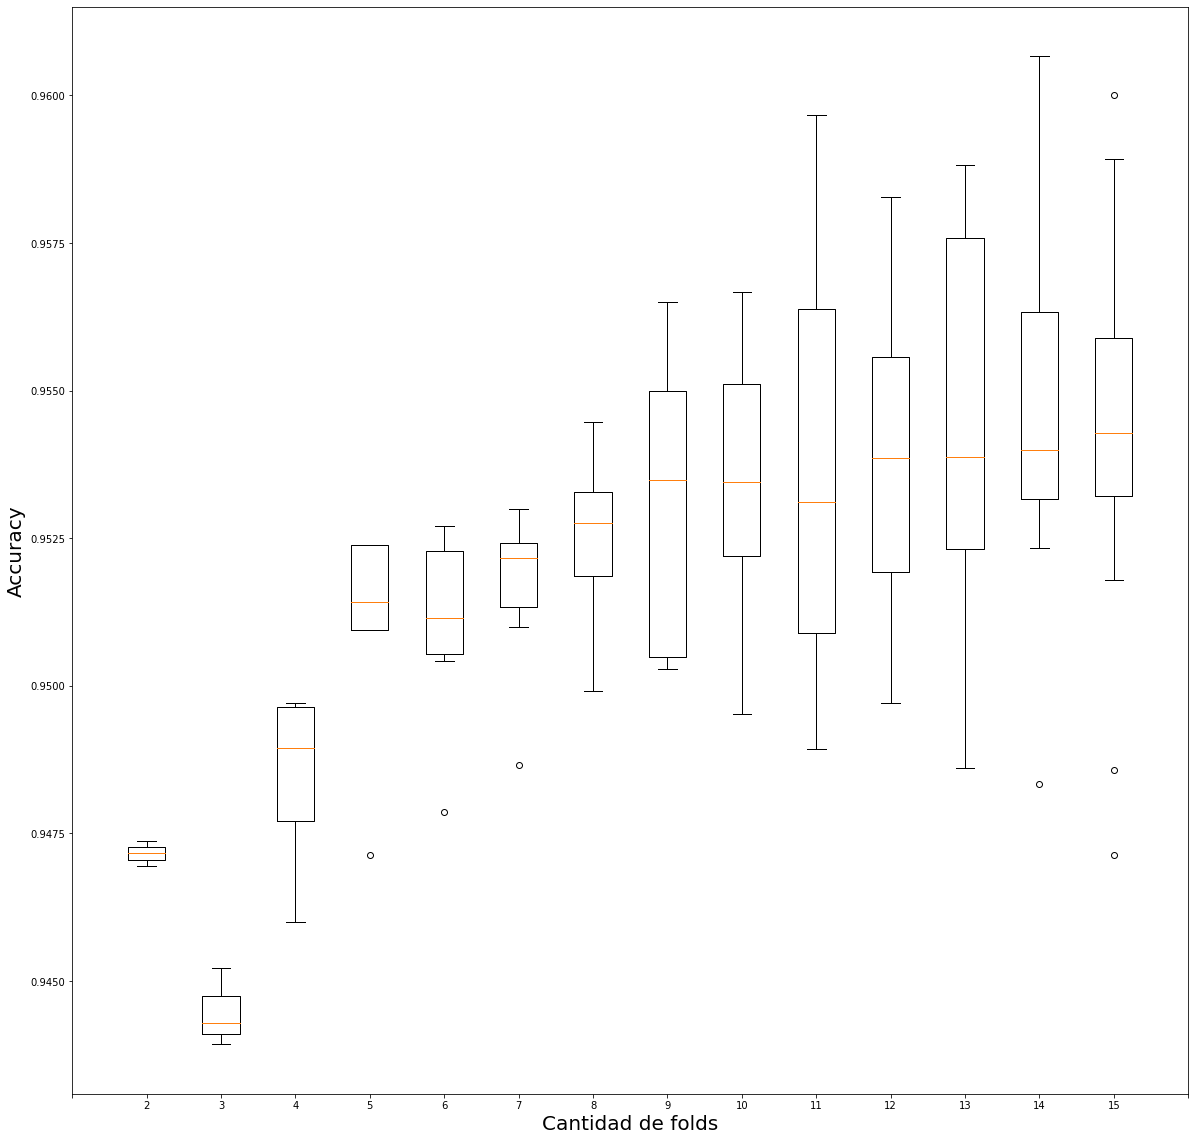

In [125]:
plt.boxplot(resultados2)
plt.rcParams["figure.figsize"] = [20,15]
plt.xticks(range(16),["",2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.xlabel('Cantidad de folds', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.savefig("kfold_resultados2.png", bbox_inches='tight')